# Assignment Advance Regression

-By Kaustubh Chepe

## Problem Statement : 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

In [1]:
#Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Reading the dataset
houses = pd.read_csv('train.csv')

# 1. Data Understanding 

In [3]:
#checking head ofdataset
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#chjeking shape
houses.shape

(1460, 81)

In [5]:
#checking info and data types of the columns
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#Checkin the nemeric factors for numeric column of the data
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


From above it looks like there presence outliers in some columns of the dataset.

# 2. Data Cleaning and pre-processing

Checking missing values

In [7]:
houses.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [8]:
#checking percentage of missing values
round(100*(houses.isnull().sum()/len(houses.index)),2).sort_values(ascending = False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
dtype: float64

In [9]:
#dropping columns with higher missing values or higher skewness with one variable value
columns_to_drop = houses.columns[((round(100*(houses.isnull().sum()/len(houses.index)),2)>=80))]

In [10]:
#dropping the columns
houses.drop(columns_to_drop, axis = 1, inplace = True)

In [11]:
#checking missing values again
round(100*(houses.isnull().sum()/len(houses.index)),2).sort_values(ascending = False).head(20)

FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
RoofMatl         0.00
RoofStyle        0.00
SalePrice        0.00
Exterior1st      0.00
Exterior2nd      0.00
dtype: float64

In [12]:
#chevking shape
houses.shape

(1460, 77)

In [13]:
#dropping missing value in electrical column
houses['Electrical'].fillna(houses['Electrical'].mode()[0], inplace=True)

In [14]:
houses['Electrical'].isnull().sum()

0

In [15]:
#checking missing values again
round(100*(houses.isnull().sum()/len(houses.index)),2).sort_values(ascending = False).head(20)

FireplaceQu     47.26
LotFrontage     17.74
GarageFinish     5.55
GarageType       5.55
GarageCond       5.55
GarageQual       5.55
GarageYrBlt      5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
YearRemodAdd     0.00
RoofStyle        0.00
Exterior2nd      0.00
RoofMatl         0.00
Exterior1st      0.00
OverallCond      0.00
dtype: float64

We will impute missing values now

In [16]:
houses['LotFrontage'] = houses['LotFrontage'].replace(np.nan, houses['LotFrontage'].median())
houses['MasVnrArea'] = houses['MasVnrArea'].replace(np.nan, houses['MasVnrArea'].median())
houses['GarageYrBlt'] = houses['GarageYrBlt'].replace(np.nan, houses['GarageYrBlt'].median())
houses['GarageYrBlt']= houses['GarageYrBlt'].fillna(0)
houses['GarageYrBlt'] = houses['GarageYrBlt'].astype(int) 

In [17]:
#checking missing values
houses['LotFrontage'].isnull().sum()

0

In [18]:
houses['GarageYrBlt'].isnull().sum()

0

In [19]:
houses['MasVnrArea'].isnull().sum()

0

In [20]:
#checking missing values again
houses.isnull().sum().sort_values(ascending = False).head(20)

FireplaceQu     690
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
LotShape          0
MasVnrArea        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterCond         0
ExterQual         0
LandContour       0
dtype: int64

As per the data dictionary other than electrical, LotFrontage, GarageYrBlt and MasVnrArea all the columns which have missing values are NA are actually meaningful missing values, mean these are actual value with some meaning for the certain volumn.

Thus we will impute these values with value as 'None'.

In [21]:
col_na= ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for column in col_na:
    houses[column]= houses[column].fillna('None')

Now as observed there is imbalance in the data set, tbus we will proceed to handle imbalance of data.

## A.Dealing skewness of data fo catagorical features.

To do this we will remove the data which have 80% of data linked with single value

In [22]:
def cols(df, pr):
    subdf= df.copy()
    lst= []
    columns = subdf.select_dtypes(include=['object'])
    for col in (columns):
        if(subdf[col].value_counts().max() > int(pr*len(subdf.index)/100)):
            lst.append(col)
    return lst
col = cols(df=houses, pr=80)
houses = houses.drop(col, axis=1)


In [23]:
#checking head of dataframe
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
houses.shape

(1460, 57)

In [25]:
#checking missing values
houses.isnull().sum().sort_values(ascending = False).head(20)

SalePrice       0
HeatingQC       0
BsmtUnfSF       0
BsmtFinSF2      0
BsmtFinSF1      0
BsmtFinType1    0
BsmtExposure    0
BsmtQual        0
Foundation      0
ExterQual       0
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofStyle       0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
OverallQual     0
HouseStyle      0
dtype: int64

As we can see no there are no missing values present in our dataset

## B. Dealing skewness of data for numeric features.

In [26]:
def cols(df, pr):
    subdf= df.copy()
    lst= []
    columns = subdf.select_dtypes(include=['int64','float64'])
    for col in (columns):
        if(subdf[col].value_counts().max() > int(pr*len(subdf.index)/100)):
            lst.append(col)
    return lst
col = cols(df=houses, pr=80)
houses = houses.drop(col, axis=1)


In [27]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,Attchd,2003,RFn,2,548,0,61,2,2008,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,Attchd,1976,RFn,2,460,298,0,5,2007,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,Attchd,2001,RFn,2,608,0,42,9,2008,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,Detchd,1998,Unf,3,642,0,35,2,2006,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,Attchd,2000,RFn,3,836,192,84,12,2008,250000


In [28]:
#rechecking missing values again
houses.isnull().sum().sort_values(ascending = False).head(20)

SalePrice       0
YrSold          0
BsmtExposure    0
BsmtQual        0
Foundation      0
ExterQual       0
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofStyle       0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
OverallQual     0
HouseStyle      0
Neighborhood    0
LotConfig       0
LotShape        0
LotArea         0
dtype: int64

# 3. Data Visualization

Plots for Categorical data with target column SalePrice : 

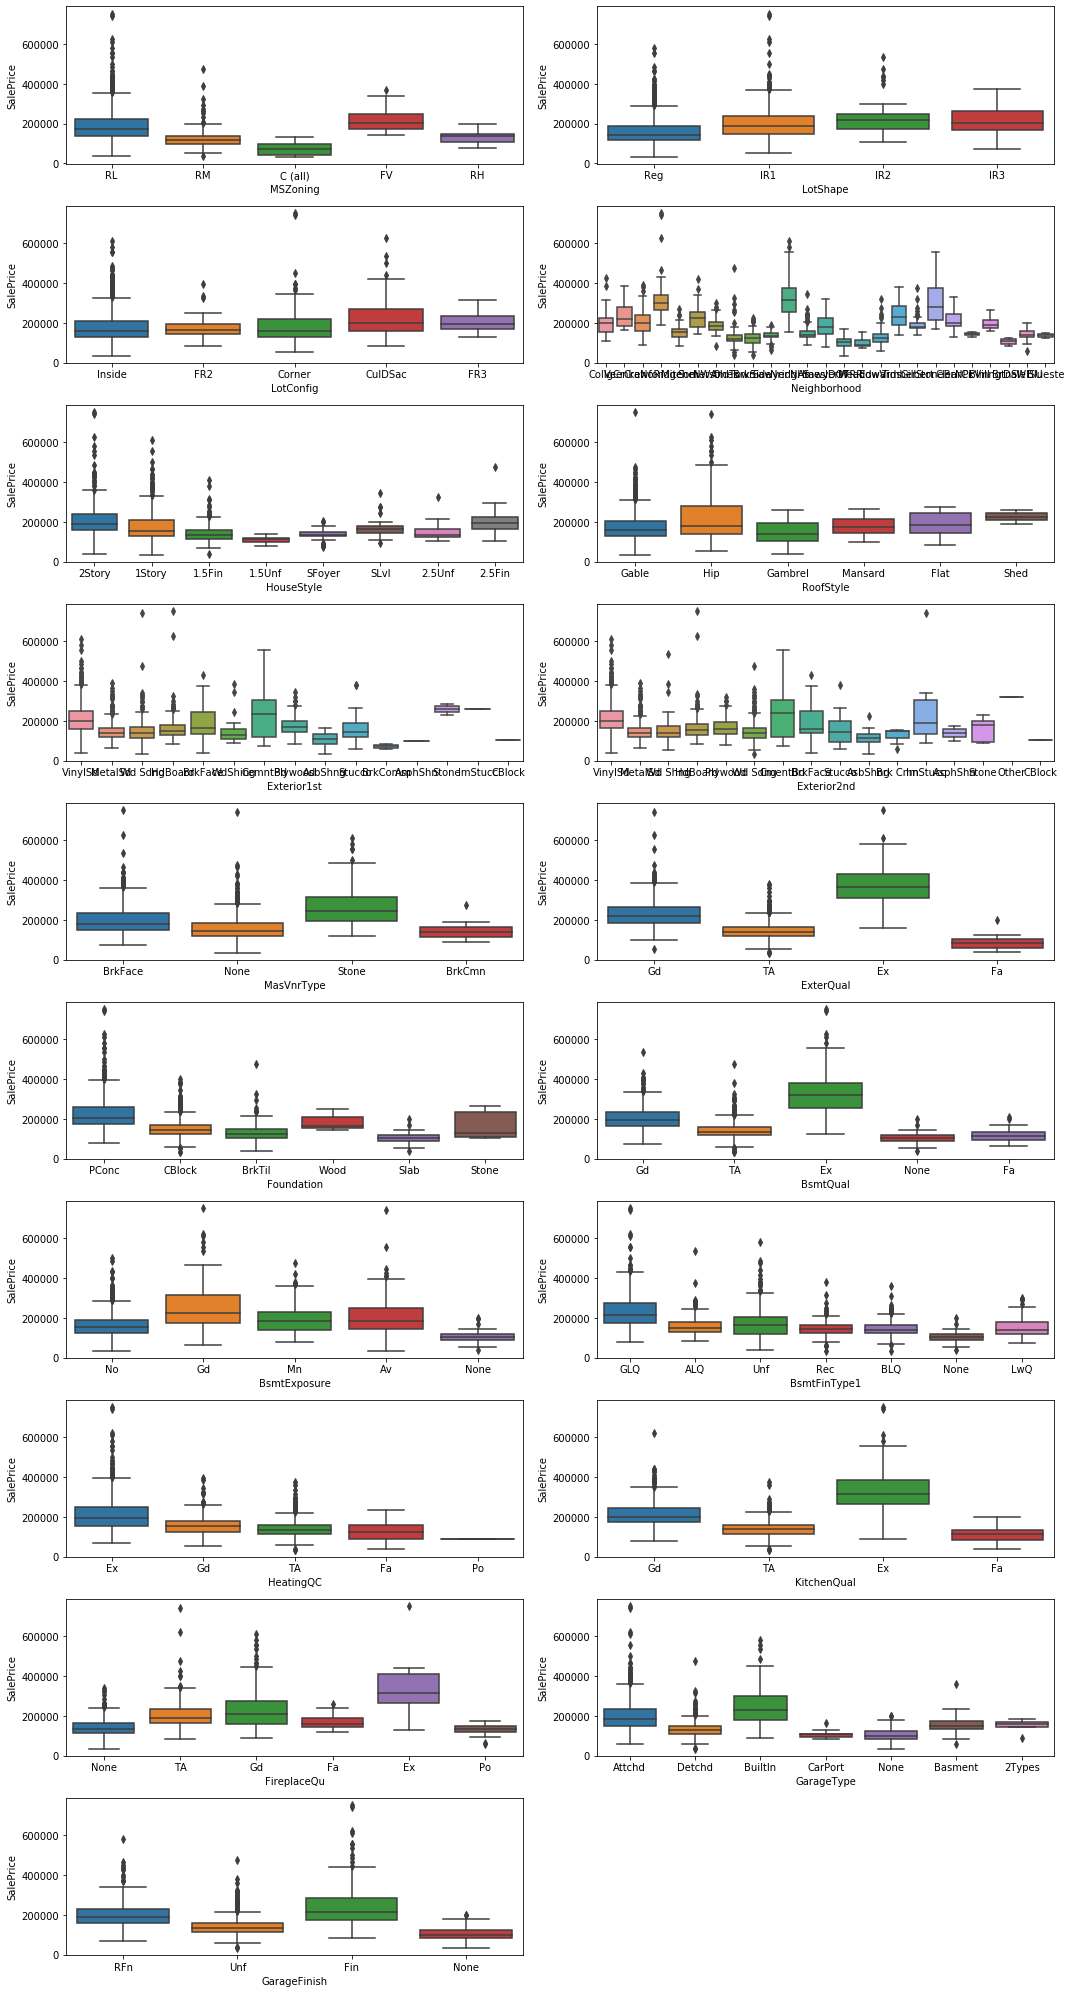

In [29]:
var = list(houses.select_dtypes(include="object").columns)
plt.figure(figsize=(15,55))
for i, c in enumerate(var, 1):
    plt.subplot(20,2,i) 
    g = sns.boxplot(x=c, y="SalePrice",data=houses.query("SalePrice>0"))

plt.tight_layout()    
plt.show() 

Plots for Numeric continuos data with target column SalePrice : 

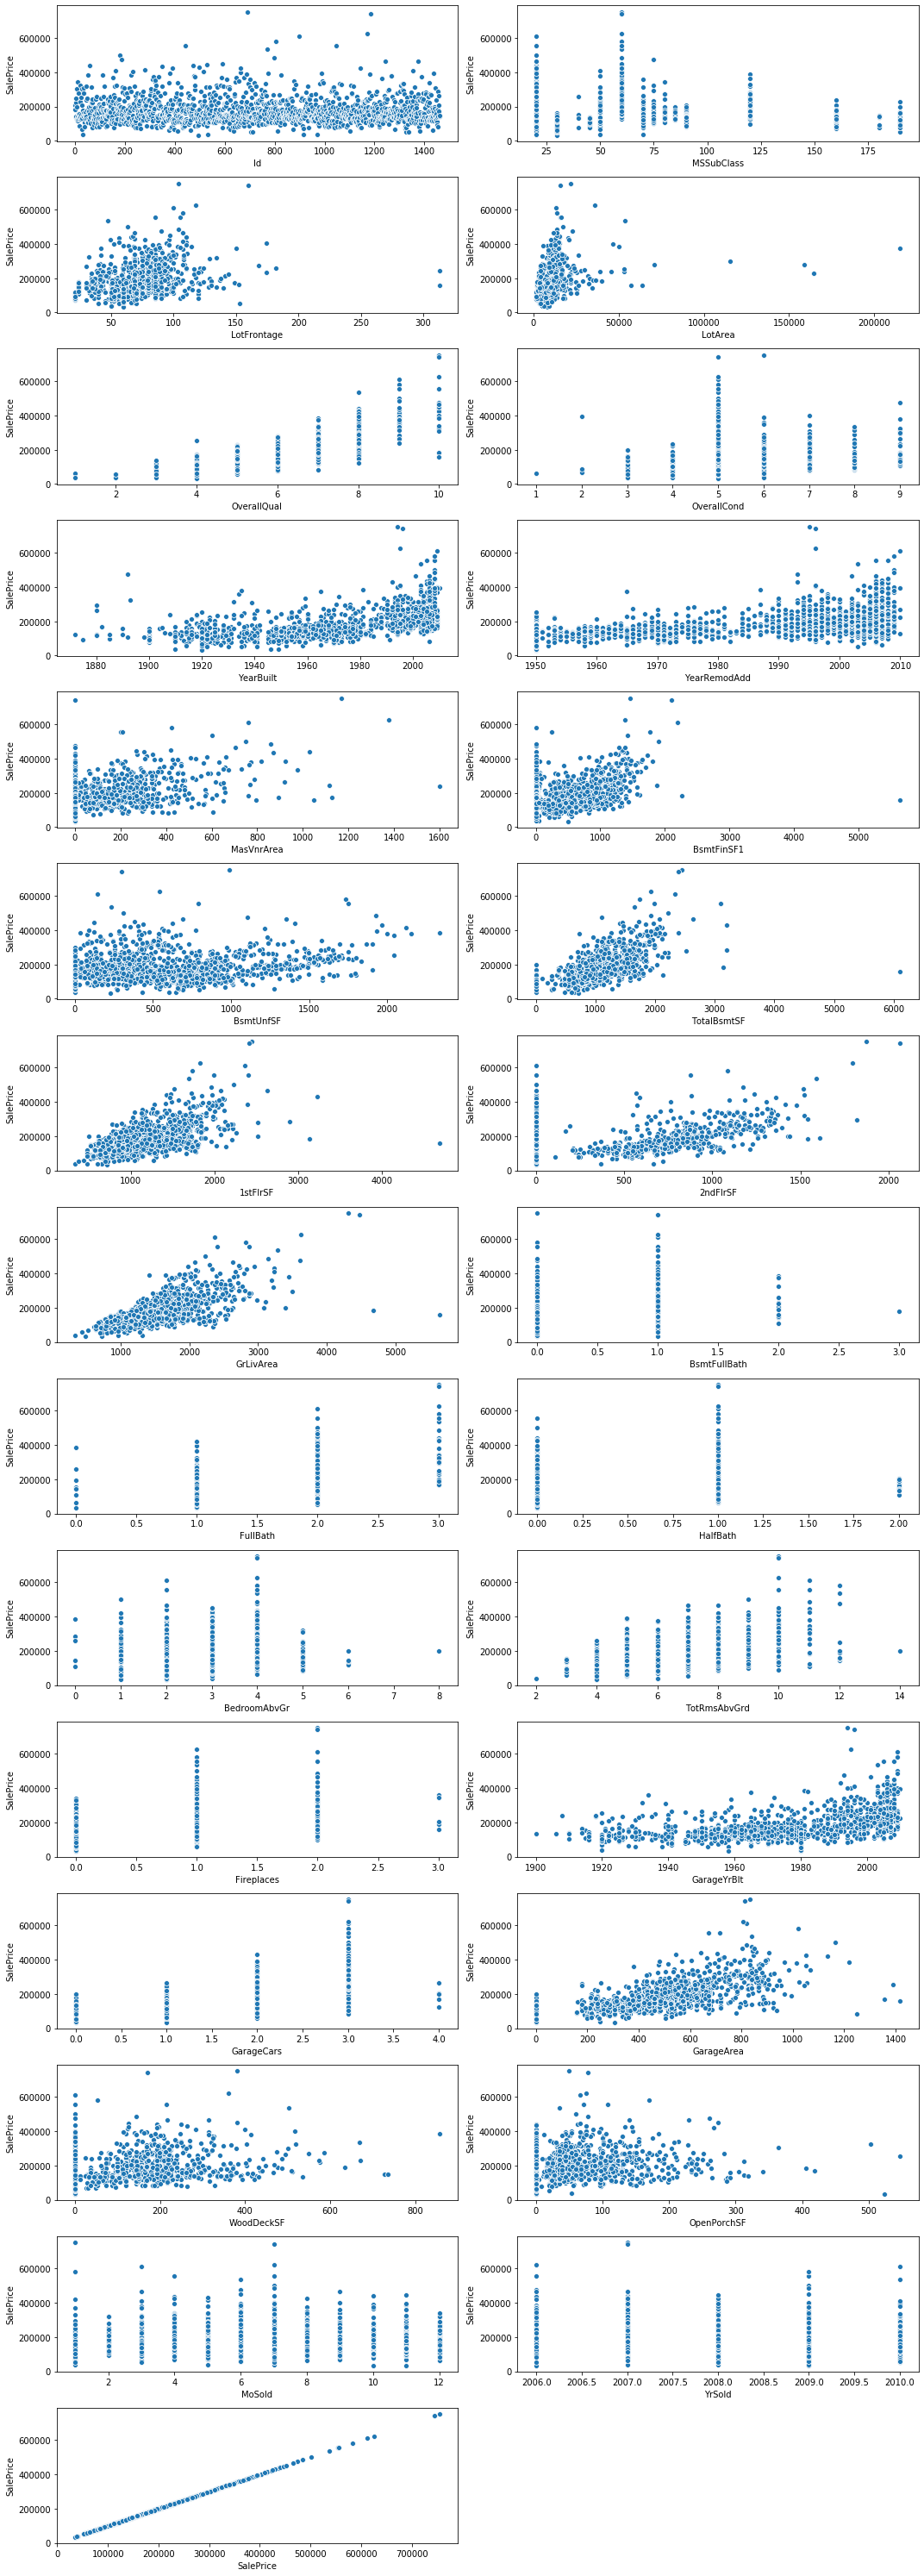

In [30]:
var = list(houses.select_dtypes(include=['int64','float64','int32','float32']).columns)
plt.figure(figsize=(15,55))
for i, c in enumerate(var, 1):
    plt.subplot(20,2,i) 
    g = sns.scatterplot(x=c, y="SalePrice",data=houses.query("SalePrice>0"))

plt.tight_layout()    
plt.show()

Oberservation : 
From above scatterplot we can see that '1stFlrSF','GrLivArea' show a positive linear relation with the SalePrice.

Heatmap:

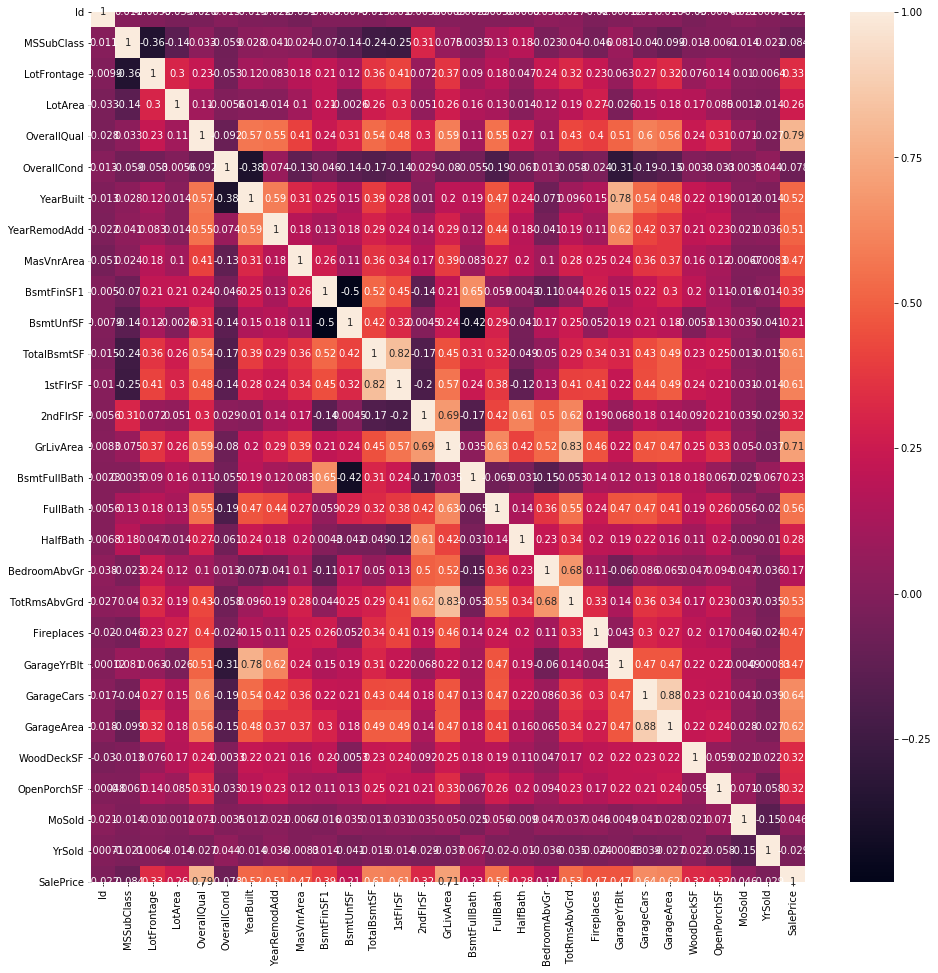

In [31]:
plt.figure(figsize=(16,16))
sns.heatmap(houses[list(houses.dtypes[houses.dtypes!='object'].index)].corr(),annot=True)
plt.show()

## Outlier treatment:

In [32]:
#checking datatypes
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
Id              1460 non-null int64
MSSubClass      1460 non-null int64
MSZoning        1460 non-null object
LotFrontage     1460 non-null float64
LotArea         1460 non-null int64
LotShape        1460 non-null object
LotConfig       1460 non-null object
Neighborhood    1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
RoofStyle       1460 non-null object
Exterior1st     1460 non-null object
Exterior2nd     1460 non-null object
MasVnrType      1460 non-null object
MasVnrArea      1460 non-null float64
ExterQual       1460 non-null object
Foundation      1460 non-null object
BsmtQual        1460 non-null object
BsmtExposure    1460 non-null object
BsmtFinType1    1460 non-null object
BsmtFinSF1      1460 non-null int64
BsmtUnfSF  

In [33]:
#filtering with numeric columns
num = list(houses.select_dtypes(include=['int64','float64','int32','float32']).columns)

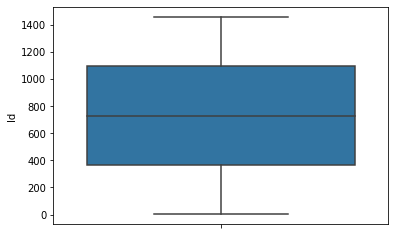

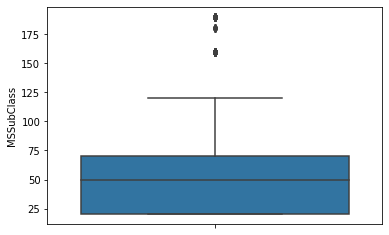

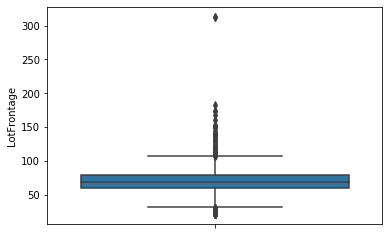

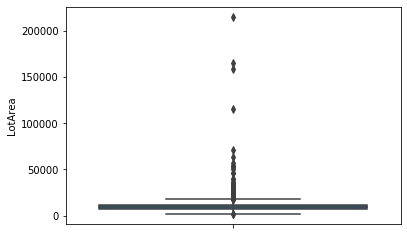

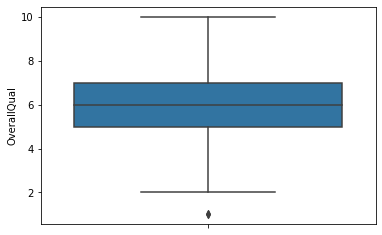

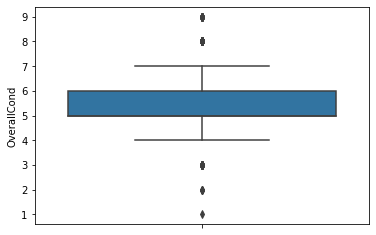

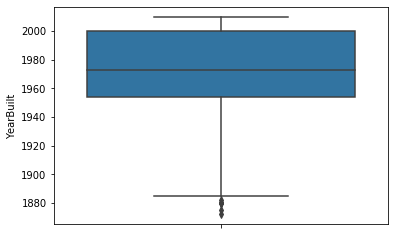

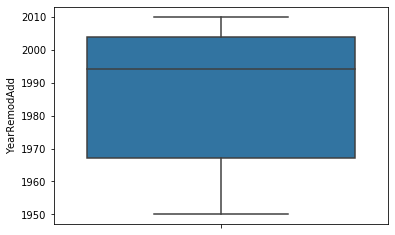

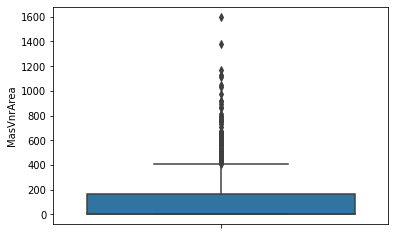

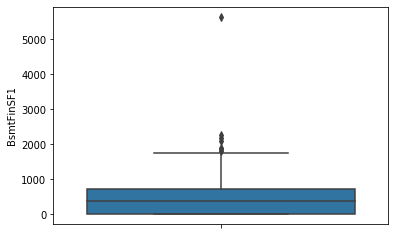

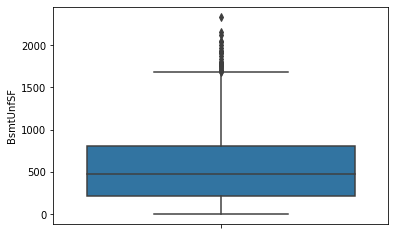

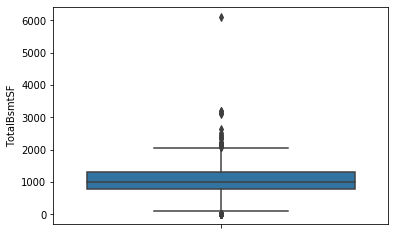

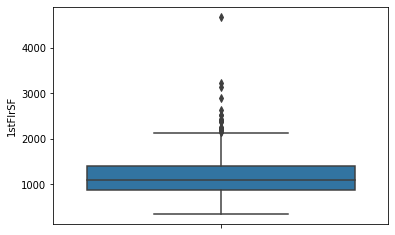

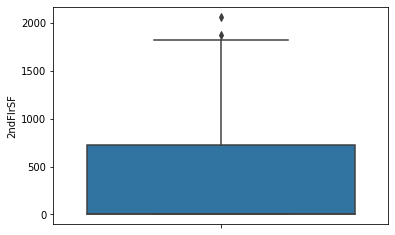

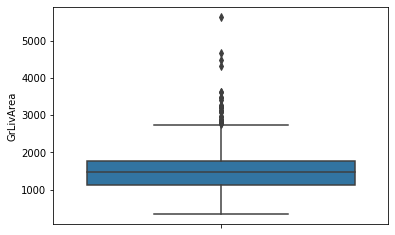

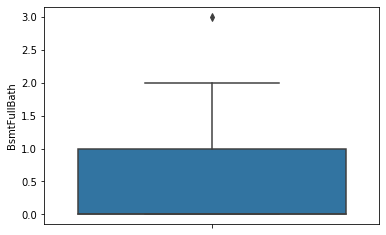

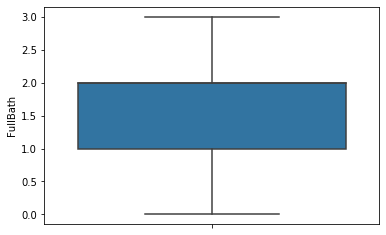

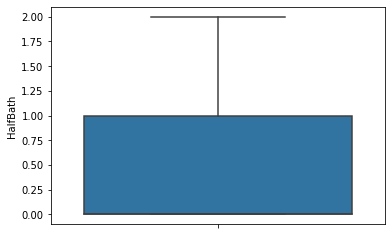

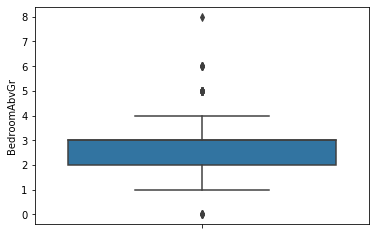

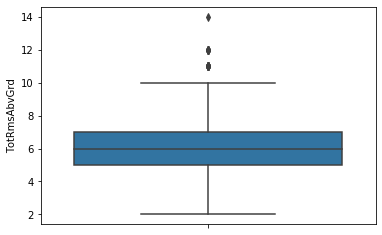

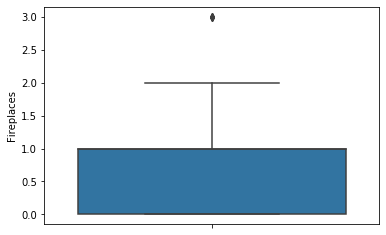

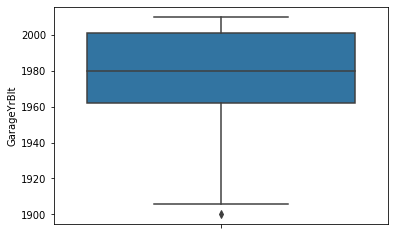

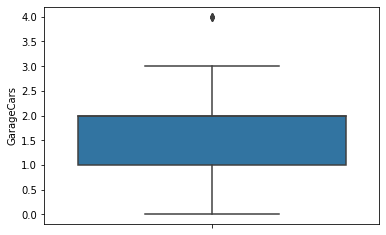

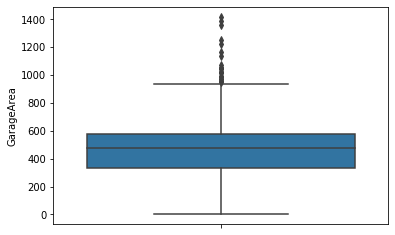

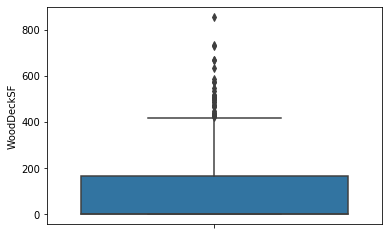

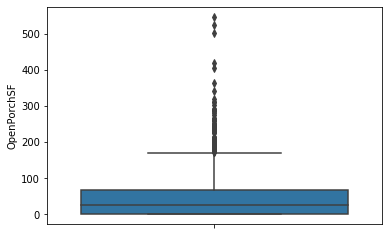

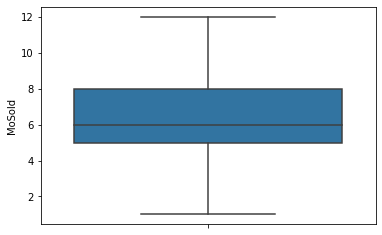

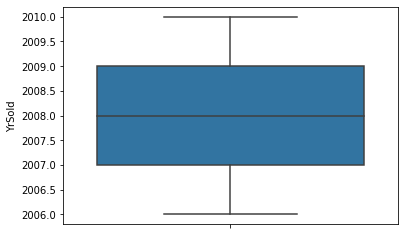

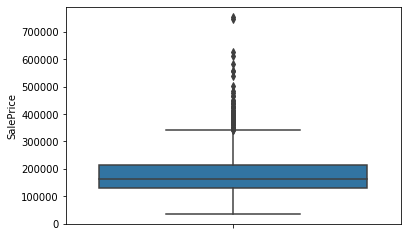

In [34]:
#plotting boxplot to detect presen of the outliers
for i in num : 
    plt.figure()
    sns.boxplot(y = i, data = houses)
    plt.show()

Observation :
From above plots we can see that there are around 10 variables which are having outliers

In [35]:
#selecting columns with outliers and eleiminating outliers abouve 99 percentile.
cols = ['LotFrontage', 'MasVnrArea','LotArea','TotalBsmtSF','OpenPorchSF','BsmtFinSF1','GrLivArea']
for i in cols:
    a = houses[i].quantile(0.99)
    houses = houses[houses[i]< a]

## Transforming Target column

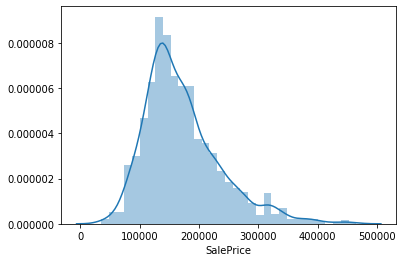

In [36]:
#plotting distrubution plot for target variable
sns.distplot(houses['SalePrice'])

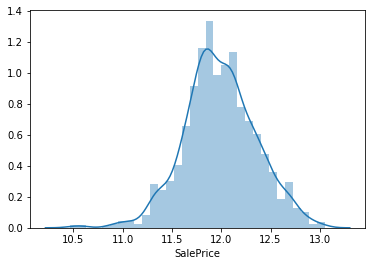

In [37]:
#taking log transform of  target variabe to normalise it
houses['SalePrice'] = np.log(houses['SalePrice'])
sns.distplot(houses['SalePrice'])

## Data Preparation :

In [38]:
#chcking the columns
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [39]:
#ordering the variables
houses['LotShape'] = houses['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
houses['ExterQual'] = houses['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
houses['BsmtQual'] = houses['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
houses['BsmtExposure'] = houses['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
houses['BsmtFinType1'] = houses['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
houses['HeatingQC'] = houses['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
houses['KitchenQual'] = houses['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
houses['FireplaceQu'] = houses['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
houses['GarageFinish'] = houses['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

In [40]:
#dropping ID column
houses = houses.drop(['Id'],axis = 1)

In [41]:
#checking shape
houses.shape

(1358, 47)

In [42]:
#Getting dummies for categorical variables
dummy = pd.get_dummies(houses[['MSSubClass','MSZoning','Neighborhood','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','GarageType','LotConfig']],drop_first=True)
houses = pd.concat([houses,dummy],axis='columns')
#houses=houses.drop(['MSSubClass','LotShape','MSZoning','Neighborhood','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','GarageType','LotConfig'],axis='columns')

In [43]:
#dropping the columns
houses=houses.drop(['MSSubClass','MSZoning','Neighborhood','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','GarageType','LotConfig'],axis='columns')

In [44]:
houses.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,65.0,8450,3,7,5,2003,2003,196.0,4,4,...,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,3,6,8,1976,1976,0.0,3,4,...,1,0,0,0,0,0,0,1,0,0
2,68.0,11250,2,7,5,2001,2002,162.0,4,4,...,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,2,7,5,1915,1970,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2,8,5,2000,2000,350.0,4,4,...,1,0,0,0,0,0,0,1,0,0


In [45]:
#checking info to check whether all the variables are numeric
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1459
Columns: 123 entries, LotFrontage to LotConfig_Inside
dtypes: float64(3), int32(1), int64(32), uint8(87)
memory usage: 502.6 KB


Now all the columns are converted to numeric.

In [46]:
sudf = houses.copy()

# 4. Regression : 

## Train Test split

In [47]:
np.random.seed(0)
df_train, df_test = train_test_split(houses, train_size=0.7, test_size = 0.3, random_state=100)

In [48]:
#checking shape
df_train.shape

(950, 123)

In [49]:
#checking shape
df_test.shape

(408, 123)

In [50]:
#Scaling the data
scaler = StandardScaler()

In [51]:
#variable with numeric column
num

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold',
 'SalePrice']

In [52]:
#removing unwanted elemnts
del num[0:2]

In [53]:
num

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold',
 'SalePrice']

In [54]:
#Getting binary columns
num1 = ['LotShape','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','FireplaceQu','GarageFinish']

In [55]:
num3 = num+num1

In [56]:
#scaling train data
df_train[num3]= scaler.fit_transform(df_train[num3])

In [57]:
#checking the train data after applying standar scaler
df_train.describe()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
count,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,...,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,-2.424888e-16,-6.077010e-17,1.007381e-16,1.556650e-16,8.040352e-17,3.712586e-15,4.670299e-15,4.744743e-17,4.527373e-16,1.402387e-17,...,0.589474,0.011579,0.055789,0.006316,0.271579,0.061053,0.058947,0.025263,0.002105,0.744211
std,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,...,0.492188,0.107037,0.229636,0.079262,0.445008,0.239553,0.235650,0.157006,0.045859,0.436534
min,-2.594030e+00,-2.107313e+00,-4.834645e+00,-3.722114e+00,-4.080635e+00,-3.207001e+00,-1.655296e+00,-6.087938e-01,-2.439784e+00,-3.772983e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.607438e-01,-5.387813e-01,-1.152951e+00,-7.406567e-01,-5.265637e-01,-5.662271e-01,-8.885349e-01,-6.087938e-01,-6.582354e-01,-4.835974e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.155306e-02,-6.541177e-02,6.878954e-01,4.707564e-03,-5.265637e-01,3.546836e-02,4.053745e-01,-6.087938e-01,-6.582354e-01,-4.835974e-01,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.238499e-01,4.515778e-01,6.878954e-01,7.500718e-01,3.619541e-01,1.004867e+00,9.325227e-01,3.722460e-01,1.123313e+00,6.128645e-01,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.751129e+00,6.412317e+00,6.878954e-01,2.986165e+00,3.027507e+00,1.272287e+00,1.220058e+00,4.860815e+00,2.904862e+00,1.709327e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
#fitting scaler on test data
df_test[num3]= scaler.transform(df_test[num3])

In [59]:
# splitting the train and test data into y and x.
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

## Recursive Feature Elimination

In [60]:
#importing linear regression and rfe
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 50)             
rfe = rfe.fit(X_train, y_train)

In [61]:
#checking ranks
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('LotFrontage', False, 21),
 ('LotArea', False, 5),
 ('LotShape', False, 62),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 35),
 ('MasVnrArea', False, 69),
 ('ExterQual', False, 59),
 ('BsmtQual', False, 58),
 ('BsmtExposure', False, 25),
 ('BsmtFinType1', False, 43),
 ('BsmtFinSF1', False, 29),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 16),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 44),
 ('FullBath', False, 57),
 ('HalfBath', False, 56),
 ('BedroomAbvGr', False, 64),
 ('KitchenQual', False, 27),
 ('TotRmsAbvGrd', False, 54),
 ('Fireplaces', False, 53),
 ('FireplaceQu', False, 7),
 ('GarageYrBlt', False, 46),
 ('GarageFinish', False, 60),
 ('GarageCars', True, 1),
 ('GarageArea', False, 28),
 ('WoodDeckSF', False, 18),
 ('OpenPorchSF', False, 34),
 ('MoSold', False, 63),
 ('YrSold', False, 45),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', Tr

Above we can see the ranking of the variables that rfe has came up with.

Now we will assigned those 50 columns to the train set

In [62]:
rfe_cols = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_cols]
X_train = X_train_rfe[X_train_rfe.columns]

# Model Building

## 1.Redge regression 

In [63]:
#List of the Alphas to tune for ridge regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}
ridge = Ridge()

In [64]:
#Cross validation technique
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

Now we find the best estimator : 

In [65]:
ridge_model_cv.best_estimator_

Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [66]:
X_test_rfe = X_test[rfe_cols]
X_test = X_test_rfe[X_test_rfe.columns]

In [67]:
#fitting model with alpha and getting r-square value
ridge = Ridge(alpha = 2.0)
ridge.fit(X_train, y_train)
y_pred= ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
r2_score_ridge_train = r2_score(y_train,y_pred)
r2_score_ridge_test = r2_score(y_test, y_pred_test)
print(r2_score_ridge_train)
print(r2_score_ridge_test)

0.9101260549564558
0.8746177612301544


In [68]:
#getting top predictors and coeff
ridf = pd.DataFrame({'Features':X_train.columns, 'Coefficient':abs(ridge.coef_.round(4))})
ridf = ridf.sort_values(by='Coefficient', ascending=False)
ridf.reset_index(drop=True, inplace=True)  
ridf.head(10)

,Features,Coefficient
0,Neighborhood_Crawfor,0.3698
1,MSZoning_RL,0.3597
2,Neighborhood_MeadowV,0.3526
3,GrLivArea,0.3247
4,MSZoning_FV,0.3127
5,Neighborhood_NridgHt,0.2974
6,Neighborhood_StoneBr,0.2870
7,GarageType_Attchd,0.2545
8,Neighborhood_BrDale,0.2505
9,Neighborhood_Somerst,0.2460


## Residual Analysis (Ridge) : 

Now we will check required assumptions for regression

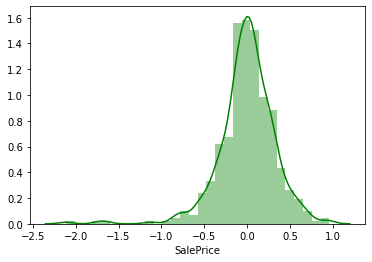

In [69]:
resi = (y_test - y_pred_test)     #residuals
sns.distplot(resi , bins = 30, color='g')

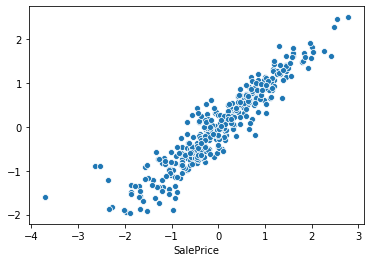

In [70]:
#checking linear relation
sns.scatterplot(y_test,y_pred_test)

In [71]:
y_test.shape

(408,)

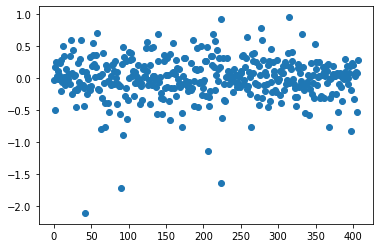

In [72]:
#checking error terms are independent or not
m = [i for i in range(0,408,1)]
res_test = (y_test-y_pred_test)
plt.scatter(m,res_test)

## Lasso Regression : 

In [73]:
lasso = Lasso()

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [74]:
#geeting best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0006, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
#fitting model with alpha and getting r-square value
lasso=Lasso(alpha = 0.0006)
lasso.fit(X_train, y_train)
y_pred= lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
r2_score_lasso_train = r2_score(y_train,y_pred)
r2_score_lasso_test = r2_score(y_test,  y_pred_test)
print(r2_score_lasso_train)
print(r2_score_lasso_test)

0.909323877088995
0.8756707276852946


In [76]:
#getting top predictors and coeff
ladf = pd.DataFrame({'Features':X_train.columns,'Coefficient':abs(lasso.coef_.round(4))})
ladf = ladf.sort_values(by='Coefficient', ascending=False)
ladf.reset_index(drop=True, inplace=True)  
ladf.head(10)

,Features,Coefficient
0,Neighborhood_Crawfor,0.3630
1,GrLivArea,0.3545
2,MSZoning_RL,0.3502
3,Neighborhood_MeadowV,0.3454
4,MSZoning_FV,0.3202
5,Neighborhood_NridgHt,0.2814
6,Neighborhood_StoneBr,0.2801
7,Neighborhood_BrDale,0.2475
8,GarageType_Attchd,0.2415
9,TotalBsmtSF,0.2352


## Residual Analysis (Lasso) : 

Now we will check required assumption for regression

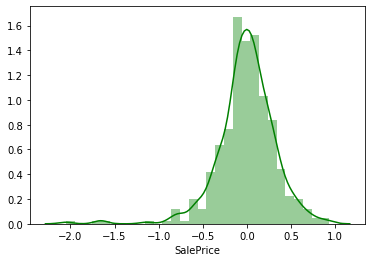

In [77]:
res1 = (y_test - y_pred_test) 
sns.distplot(res1 , bins = 30, color='g')

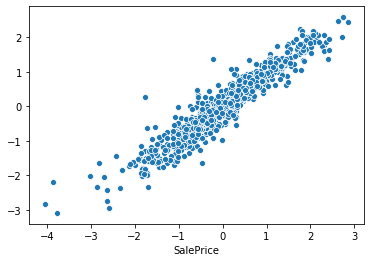

In [78]:
#cheking linear relation
sns.scatterplot(y_train,y_pred)

In [79]:
y_test.shape

(408,)

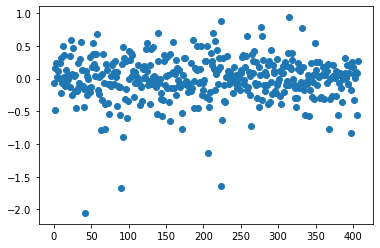

In [80]:
#Checking error terms
l = [i for i in range(0,408,1)]
res_test = (y_test-y_pred_test)
plt.scatter(l,res_test)

## Now we will answer the questions : 

Note : Here in notebook only question 1 and Question 2 is mentioned as it required coding changes. All four are answered in PDF file.

## Question 1 : 

Optimal Values of alpha for Ridge : 2.0

Optimal Values of alpha for Lasso : 0.0006

Doubling the apha values for ridge and lasso regression : 

Ridge Regression : 

In [81]:
#doubling the alpha and bulding the ridge model
ridge = Ridge(alpha = 4.0)
ridge.fit(X_train, y_train)
y_pred= ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
r2_score_ridge_train = r2_score(y_train,y_pred)
r2_score_ridge_test = r2_score(y_test, y_pred_test)
print(r2_score_ridge_train)
print(r2_score_ridge_test)

0.9086015016829656
0.8753942548141012


In [82]:
rdf = pd.DataFrame({'Features':X_train.columns,'Coefficient':abs(ridge.coef_.round(4))})

In [83]:
#getting predictors and coeff
rdf = rdf.sort_values(by='Coefficient', ascending=False)
rdf.reset_index(drop=True, inplace=True)
rdf.head(10)

,Features,Coefficient
0,Neighborhood_Crawfor,0.3341
1,Neighborhood_MeadowV,0.2851
2,GrLivArea,0.2765
3,Neighborhood_NridgHt,0.2636
4,MSZoning_RL,0.2567
5,Neighborhood_StoneBr,0.2449
6,TotalBsmtSF,0.2343
7,YearBuilt,0.2306
8,MSZoning_FV,0.2211
9,Neighborhood_Somerst,0.2176


Lasso Regression : 

In [84]:
#doubling the alpha and bulding the Lasso model
lasso=Lasso(alpha = 0.0012)
lasso.fit(X_train, y_train)
y_pred= lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
r2_score_lasso_train = r2_score(y_train,y_pred)
r2_score_lasso_test = r2_score(y_test,  y_pred_test)
print(r2_score_lasso_train)
print(r2_score_lasso_test)

0.9062348911728326
0.8757045443255819


In [85]:
#getiing predictors and their coeff
ldf = pd.DataFrame({'Features':X_train.columns,'Coefficient':abs(lasso.coef_.round(4))})
ldf = ldf.sort_values(by='Coefficient', ascending=False)
ldf.reset_index(drop=True, inplace=True)  
ldf.head(10)

,Features,Coefficient
0,GrLivArea,0.3540
1,Neighborhood_Crawfor,0.3251
2,Neighborhood_MeadowV,0.2502
3,TotalBsmtSF,0.2366
4,YearBuilt,0.2322
5,Neighborhood_NridgHt,0.2246
6,OverallQual,0.2233
7,Neighborhood_StoneBr,0.2102
8,Neighborhood_BrDale,0.2027
9,GarageType_Attchd,0.1982


## Question 3 :

In [86]:
#Getting top five features from our original lasso model
df1 = ladf.loc[:9]

In [87]:
top5lasso = list(df1['Features'].iloc[0:5])

In [88]:
#top 5 predictors before
top5lasso

['Neighborhood_Crawfor',
 'GrLivArea',
 'MSZoning_RL',
 'Neighborhood_MeadowV',
 'MSZoning_FV']

In [89]:
#dropping top 5 predictors
sudf = sudf.drop(top5lasso, axis = 1)
sudf.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,65.0,8450,3,7,5,2003,2003,196.0,4,4,...,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,3,6,8,1976,1976,0.0,3,4,...,1,0,0,0,0,0,0,1,0,0
2,68.0,11250,2,7,5,2001,2002,162.0,4,4,...,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,2,7,5,1915,1970,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2,8,5,2000,2000,350.0,4,4,...,1,0,0,0,0,0,0,1,0,0


Train Test Split : 

In [90]:
np.random.seed(0)
df_train, df_test = train_test_split(sudf, train_size=0.7, test_size = 0.3, random_state=100)

Feature Scaling : 

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [92]:
num3

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotShape',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish']

In [93]:
#removing unwanted variable
num3.pop((12))

'GrLivArea'

In [94]:
#crosschecking
num3[12]

'BsmtFullBath'

In [95]:
#trasforming train data
df_train[num3]= scaler.fit_transform(df_train[num3])

In [96]:
#scaling test data
df_test[num3]= scaler.transform(df_test[num3])

In [97]:
# splitting the train and test data into y and x.
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

## Recurssive Feature Elimination :

In [98]:
#importing linear regression and rfe
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 50)             
rfe = rfe.fit(X_train, y_train)

In [99]:
#getting rank
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('LotFrontage', False, 13),
 ('LotArea', True, 1),
 ('LotShape', False, 65),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 35),
 ('MasVnrArea', False, 55),
 ('ExterQual', False, 57),
 ('BsmtQual', False, 64),
 ('BsmtExposure', False, 28),
 ('BsmtFinType1', False, 48),
 ('BsmtFinSF1', False, 19),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 15),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('BsmtFullBath', False, 41),
 ('FullBath', False, 51),
 ('HalfBath', False, 52),
 ('BedroomAbvGr', False, 59),
 ('KitchenQual', False, 27),
 ('TotRmsAbvGrd', False, 45),
 ('Fireplaces', False, 8),
 ('FireplaceQu', False, 30),
 ('GarageYrBlt', False, 53),
 ('GarageFinish', False, 63),
 ('GarageCars', False, 5),
 ('GarageArea', False, 47),
 ('WoodDeckSF', False, 20),
 ('OpenPorchSF', False, 33),
 ('MoSold', False, 56),
 ('YrSold', False, 40),
 ('MSZoning_RH', False, 7),
 ('MSZoning_RM', True, 1),
 ('Neighborhood_

In [100]:
rfe_cols = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_cols]
X_train = X_train_rfe[X_train_rfe.columns]

Lasso Regression model building

In [101]:
lasso = Lasso()

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [102]:
#Getiing best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [103]:
lasso = Lasso(alpha=0.0001)        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
#getting top 5 new predictors
newladf = pd.DataFrame({'Features':X_train.columns,'Coefficient':abs(lasso.coef_.round(4))})
newladf = newladf.sort_values(by='Coefficient', ascending=False)
newladf.reset_index(drop=True, inplace=True)  
newladf.head(5)

,Features,Coefficient
0,Exterior1st_BrkComm,0.4373
1,Exterior2nd_CmentBd,0.3886
2,Exterior1st_Stone,0.3838
3,Exterior1st_CemntBd,0.3815
4,Neighborhood_BrDale,0.3448
